## Fields

In [1]:
# import packages
import sys
import os
from dotenv import load_dotenv
from IPython.display import display, HTML
import json
import matplotlib.pyplot as plt
import folium
import pandas as pd
import geopandas as gpd

# Load environment variables from .env file
load_dotenv()

# import the API builder
sys.path.append(os.path.abspath("../../"))
from scoutmaster.api import ScoutMasterAPI

In [2]:
# Scoutmaster API - Credentials
client_id = os.getenv('SM_CLIENT_ID')
client_secret = os.getenv('SM_CLIENT_SECRET')
project_id = os.getenv('SM_PROJECT_ID')
dev = os.getenv("DEV")

# Scoutmaster API - Init
SM_API = ScoutMasterAPI(dev)
SM_API.authenticate(client_id=client_id, client_secret=client_secret)

✅ Successfully authenticated ScoutMaster API
HOST: https://dev-api.scoutmaster.nl/v2/


In [3]:
output_folder = "../../data/output/"

In [4]:
SM_API.output_format = 'df'
df_fields = SM_API.fields(project_id=project_id)
df_fields 

[{'id': '39507fbd-6f0e-49e5-bdb2-f36d964cffa1', 'name': 'bieten rombouts 25', 'address': {'road': 'Brede Balrouw', 'state': 'Noord-Brabant', 'hamlet': 'Kruisstraat', 'country': 'Nederland', 'village': 'Hoeven', 'postcode': '4741 RN', 'country_code': 'nl', 'municipality': 'Halderberge', 'ISO3166-2-lvl4': 'NL-NB'}, 'area_ha': 3.13, 'geometry': 'POLYGON((4.57549667 51.58900725,4.57435942 51.58943386,4.57426822 51.58945719,4.57428446 51.58949512,4.57487396 51.59010122,4.575445 51.59068571,4.57664187 51.59190862,4.57674372 51.59201086,4.57687035 51.59174289,4.57710088 51.5912525,4.57716987 51.59117347,4.57724694 51.59110844,4.57751072 51.59093761,4.57749517 51.59091839,4.57698386 51.59037508,4.57646568 51.58981891,4.57579688 51.5891293,4.57563615 51.58896726,4.57549667 51.58900725))', 'created_at': '2025-07-30T13:42:43.496+00:00', 'deleted_at': None, 'properties': {'description': 'A description of the field'}, 'updated_at': '2025-07-30T13:42:43.496+00:00', 'country_code': None, 'reference_p

,id,name,address,area_ha,geometry,created_at,deleted_at,properties,updated_at,country_code,reference_point
0,39507fbd-6f0e-49e5-bdb2-f36d964cffa1,bieten rombouts 25,"{'road': 'Brede Balrouw', 'state': 'Noord-Brab...",3.13,"POLYGON((4.57549667 51.58900725,4.57435942 51....",2025-07-30T13:42:43.496+00:00,None,{'description': 'A description of the field'},2025-07-30T13:42:43.496+00:00,None,None
1,fb34d37d-baa1-4e8a-a8cd-5a5f60c5e7c3,KNVB zeist - veld 2,"{'road': 'Woudenbergseweg', 'town': 'Zeist', '...",0.79,"POLYGON((5.2931019551254 52.089336855448,5.291...",2025-08-14T12:33:40.256+00:00,None,{'description': 'A description of the field'},2025-08-14T12:33:40.256+00:00,None,None


In [5]:
SM_API.output_format = 'geojson'
geojson_fields = SM_API.fields(project_id)

output_file =  output_folder + 'fields.geojson'
with open(output_file, "w") as f:
    if isinstance(geojson_fields, str):
        f.write(geojson_fields)
    else:
        # If it's a Python dict, convert to JSON first
        json.dump(geojson_fields, f, indent=2)

{'type': 'FeatureCollection', 'crs': {'type': 'name', 'properties': {'name': 'urn:ogc:def:crs:EPSG::4326'}}, 'features': [{'type': 'Feature', 'geometry': {'type': 'Polygon', 'coordinates': [[[4.57549667, 51.58900725], [4.57435942, 51.58943386], [4.57426822, 51.58945719], [4.57428446, 51.58949512], [4.57487396, 51.59010122], [4.575445, 51.59068571], [4.57664187, 51.59190862], [4.57674372, 51.59201086], [4.57687035, 51.59174289], [4.57710088, 51.5912525], [4.57716987, 51.59117347], [4.57724694, 51.59110844], [4.57751072, 51.59093761], [4.57749517, 51.59091839], [4.57698386, 51.59037508], [4.57646568, 51.58981891], [4.57579688, 51.5891293], [4.57563615, 51.58896726], [4.57549667, 51.58900725]]]}, 'properties': {'id': '39507fbd-6f0e-49e5-bdb2-f36d964cffa1', 'name': 'bieten rombouts 25', 'address': {'road': 'Brede Balrouw', 'state': 'Noord-Brabant', 'hamlet': 'Kruisstraat', 'country': 'Nederland', 'village': 'Hoeven', 'postcode': '4741 RN', 'country_code': 'nl', 'municipality': 'Halderberge

{'type': 'FeatureCollection', 'crs': {'type': 'name', 'properties': {'name': 'urn:ogc:def:crs:EPSG::4326'}}, 'features': [{'type': 'Feature', 'geometry': {'type': 'Polygon', 'coordinates': [[[4.57549667, 51.58900725], [4.57435942, 51.58943386], [4.57426822, 51.58945719], [4.57428446, 51.58949512], [4.57487396, 51.59010122], [4.575445, 51.59068571], [4.57664187, 51.59190862], [4.57674372, 51.59201086], [4.57687035, 51.59174289], [4.57710088, 51.5912525], [4.57716987, 51.59117347], [4.57724694, 51.59110844], [4.57751072, 51.59093761], [4.57749517, 51.59091839], [4.57698386, 51.59037508], [4.57646568, 51.58981891], [4.57579688, 51.5891293], [4.57563615, 51.58896726], [4.57549667, 51.58900725]]]}, 'properties': {'id': '39507fbd-6f0e-49e5-bdb2-f36d964cffa1', 'name': 'bieten rombouts 25', 'address': {'road': 'Brede Balrouw', 'state': 'Noord-Brabant', 'hamlet': 'Kruisstraat', 'country': 'Nederland', 'village': 'Hoeven', 'postcode': '4741 RN', 'country_code': 'nl', 'municipality': 'Halderberge

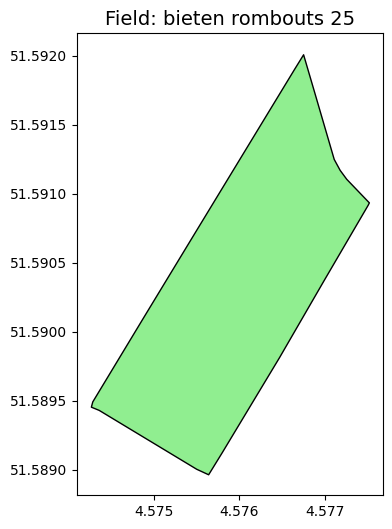

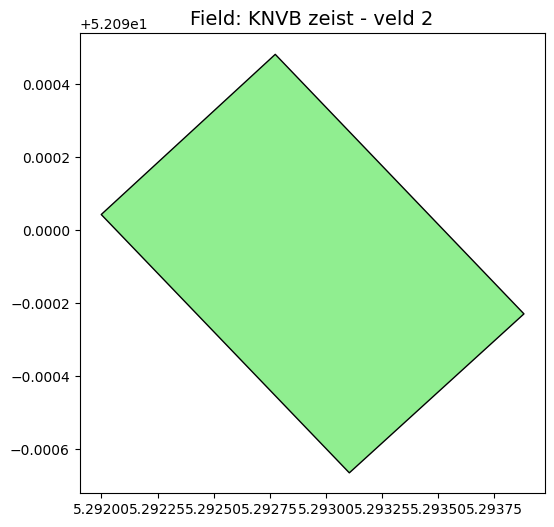

In [6]:
SM_API.output_format = 'gdf'
gdf_fields = SM_API.fields(project_id=project_id)
gdf_fields_subset = gdf_fields.iloc[0:10]
for index, row in gdf_fields_subset.iterrows():
    # Select single row as GeoDataFrame
    gdf_field = gdf_fields_subset.loc[[index]]  # double brackets to keep it as GeoDataFrame

    # Get field name from row (replace 'field_name' with the actual column name)
    field_name = row['name']  
    # Plot
    ax = gdf_field.plot(figsize=(6, 6), edgecolor='black', facecolor='lightgreen')
    ax.set_title(f"Field: {field_name}", fontsize=14)
    plt.show()

In [7]:
gdf_fields

,geometry,id,name,address,area_ha,created_at,deleted_at,properties,updated_at,country_code,reference_point
0,"POLYGON ((4.5755 51.58901, 4.57436 51.58943, 4...",39507fbd-6f0e-49e5-bdb2-f36d964cffa1,bieten rombouts 25,"{'road': 'Brede Balrouw', 'state': 'Noord-Brab...",3.13,2025-07-30T13:42:43.496+00:00,None,{'description': 'A description of the field'},2025-07-30T13:42:43.496+00:00,None,None
1,"POLYGON ((5.2931 52.08934, 5.292 52.09004, 5.2...",fb34d37d-baa1-4e8a-a8cd-5a5f60c5e7c3,KNVB zeist - veld 2,"{'road': 'Woudenbergseweg', 'town': 'Zeist', '...",0.79,2025-08-14T12:33:40.256+00:00,None,{'description': 'A description of the field'},2025-08-14T12:33:40.256+00:00,None,None


In [8]:
# Convert 'created_at' to datetime
gdf_fields = gdf_fields.copy()
gdf_fields["created_at"] = pd.to_datetime(
    "2025-06-16T16:54:23.294+00:00", utc=True
)

# Reproject to metric CRS for calculations
gdf_proj = gdf_fields.to_crs(epsg=3857)

# Compute centroid in projected CRS
centroid_proj = gdf_proj.geometry.centroid.unary_union.centroid

# Transform centroid back to WGS84 for folium
centroid = gpd.GeoSeries([centroid_proj], crs=gdf_proj.crs).to_crs(epsg=4326).iloc[0]

# Transform geometries back to WGS84 for display
gdf_wgs = gdf_proj.to_crs(epsg=4326)

# Compute map bounds
total_bounds = gdf_wgs.total_bounds
sw = [total_bounds[1], total_bounds[0]]
ne = [total_bounds[3], total_bounds[2]]

# Create folium map with Esri imagery
m = folium.Map(
    location=[centroid.y, centroid.x],
    tiles="Esri.WorldImagery",
    attr="Esri"
)

m.fit_bounds([sw, ne])

# Add polygons
for idx, row in gdf_wgs.iterrows():
    popup_text = "<b>Field Details</b><br>"
    for col in gdf_wgs.columns:
        if col != "geometry":
            popup_text += f"<b>{col}:</b> {row[col]}<br>"
        
    folium.GeoJson(
        row.geometry,
        name=str(idx),
        popup=folium.Popup(popup_text, max_width=400)
    ).add_to(m)

display(m)


C:\Users\Rinus\AppData\Local\Temp\ipykernel_27680\1696706695.py:11: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  centroid_proj = gdf_proj.geometry.centroid.unary_union.centroid
